# Test del mio algoritmo sul dataset di classificazione mail spam

### 0) Importo le librerie necessarie

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

### 1) Sigmoid o Logistic function
Per effettuare la classificazione serve una funzione con codominio [0,1]. Infatti la predizione si baserà sulla probabilità della stima di appartenere ad una o all'altra classe

In [20]:
def logistic(z):
    den = 1 + np.exp(-z)
    sigm = 1.0/den
    return sigm

### 2) Funzione di ipotesi
Per approssimare una probabilità, la funzione di costo sarà basta sulla funzione logisitca

In [21]:
def hyp(W,X):
    param = np.dot(W,X.T)
    return logistic(param)

### 3) Funzione di costo
Da massimizzare nello step di ottimizzazione. IN particolare il logaritmo della funzione di coston

In [22]:
def cost(W,X,Y):
    m = X.shape[0]
    h = hyp(W,X)
    log_h = np.log(h)
    log_one_h = np.log(1-h)
    l_cost = float((-1.0/m) * ((np.dot(log_h,Y)) + (np.dot(log_one_h,(1-Y)))))
    return l_cost

### 4) Carico e preparo i dati

In [23]:
# Carico il dataset
path = './heart.csv'
data = pd.read_csv(path)

data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:

data.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [25]:
data.shape

(303, 14)

In [26]:
# Nomi delle features e del target
colum_num = data.columns.shape[0]-1

X_name = data.columns.values[0:colum_num-1].tolist()
Y_name = [data.columns.values[colum_num]]

In [27]:

# Creo train e test set
X_train, X_test, Y_train, Y_test = train_test_split(data[X_name], data[Y_name], test_size=0.23)


m_tr, n_tr = X_train.shape
X_train = np.concatenate((np.ones((m_tr,1)), X_train), axis=1)
n_tr +=1

m_te, n_te = X_test.shape
X_test = np.concatenate((np.ones((m_te,1)), X_test), axis=1)
n_te += 1

W = np.array(np.zeros((1,n_te)))
#W = np.matrix(np.random.randn((n_te)))

Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

# Normalizzo i dati
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#cost(W,X_train,Y_train)
X_train.shape, Y_train.shape, W.shape

((233, 13), (233, 1), (1, 13))

### 5) Fit dell'algoritmo con gradient ascent
Cerco il punto di massimo della funzione di costo per trovare i pesi ottimi

In [28]:
def gradient_ascent(X,W,Y,alpha,stop):
    m,n = X.shape
    cost_old = np.inf
    cost_new = cost(W,X,Y)
    print(cost_old - cost(W,X,Y))
    sum = 0
    iter = 0

    while(abs(cost_old-cost_new) > stop):
        for j in range(0,n):
            for i in range(0,m):
                sum += (Y[i][0] - hyp(W,X[i])) * X[i][j]
            W[0][j] = W[0][j] + (alpha/m) * sum
        cost_old = cost_new
        cost_new = cost(W,X,Y)
        print(cost_old - cost(W,X,Y))
        iter += 1

    return iter  

gradient_ascent(X_train,W,Y_train,0.00001,0.01)
W

inf
2.0396035341763152e-06


array([[ 0.00000000e+00, -1.09308539e-06, -2.54683376e-06,
        -3.45783529e-07, -1.17864837e-06, -1.55784074e-06,
        -1.73519153e-06, -9.27388177e-07,  1.33093971e-06,
        -8.67781850e-07, -2.95284481e-06, -1.24633992e-06,
        -3.18706592e-06]])

### 6) Model Assestement
Miglior train accurancy (in base a progetti trovati su Kaggle): 0,90

In [29]:
def prediction(W,X,Y):
    m = X.shape[0]
    h = hyp(X, W)
    Y_hat = h > 0.5 
    accuracy = 1.0/m * np.sum(Y == Y_hat)
    return accuracy, Y_hat, h

Y_hat_prob = prediction(W,X_test,Y_test)[2]

print("### MyLog:\n\tAccuracy of training: "+str(prediction(W,X_train,Y_train)[0])+"\n\tAccuracy of test: "+str(prediction(W,X_test,Y_test)[0]))
print("### MyLog:\n\tError rate of training: "+str(1 - prediction(W,X_train,Y_train)[0])+"\n\tError rate of test: "+str(1 - prediction(W,X_test,Y_test)[0]))

### MyLog:
	Accuracy of training: 0.7896995708154506
	Accuracy of test: 0.7285714285714285
### MyLog:
	Error rate of training: 0.2103004291845494
	Error rate of test: 0.27142857142857146


#### - Metrica errore

In [30]:
metric_error = len(data[data.output == 0]) / len(data)
metric_accurancy = 1 - metric_error

(metric_error,metric_accurancy)

(0.45544554455445546, 0.5445544554455446)

#### - Confusion Matrix

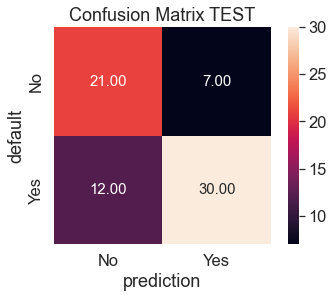

In [31]:
predictions = prediction(W,X_test,Y_test)[1]

cm = confusion_matrix(Y_test, predictions)
plt.figure()
sns.set(font_scale=1.5)
hm = sns.heatmap( cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=['No', 'Yes'], xticklabels=['No', 'Yes'])
plt.title('Confusion Matrix TEST')
plt.ylabel('default')
plt.xlabel('prediction')
plt.show()

#### - Precision e Recall curve

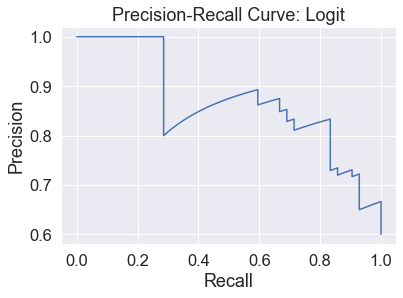

Precision:  0.6086956521739131
Recall:  1.0
f1-score:  0.759493670886076


In [32]:
precision, recall, thresholds = precision_recall_curve(Y_test, Y_hat_prob)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve: Logit")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print("Precision: ", precision[1])
print("Recall: ", recall[1])
print("f1-score: ", f1_score(Y_test, predictions))

#### - ROC e AUC curves

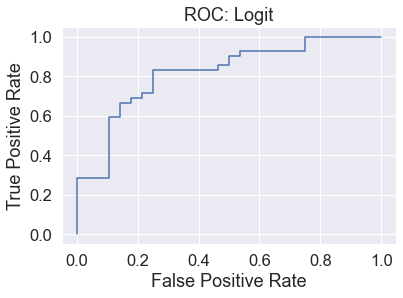

AUC:  0.7321428571428572


In [33]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_hat_prob)
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC: Logit")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print ("AUC: ", roc_auc_score(Y_test, predictions))

- Learning curve

[ 20  67 114 161 209]
***************
[[0.95       0.95       0.95       0.95       0.95       0.95
  0.95       0.95       0.95       0.95      ]
 [0.92537313 0.94029851 0.91044776 0.97014925 0.97014925 0.97014925
  0.97014925 0.97014925 0.97014925 0.97014925]
 [0.86842105 0.87719298 0.85964912 0.84210526 0.90350877 0.88596491
  0.90350877 0.90350877 0.90350877 0.90350877]
 [0.85714286 0.86335404 0.85714286 0.83850932 0.88198758 0.86335404
  0.86335404 0.85714286 0.85093168 0.85093168]
 [0.83732057 0.85645933 0.83732057 0.84210526 0.86124402 0.84210526
  0.86602871 0.84688995 0.85645933 0.85167464]]
***************
[[0.83333333 0.83333333 0.875      0.86956522 0.65217391 0.73913043
  0.69565217 0.65217391 0.73913043 0.69565217]
 [0.79166667 0.70833333 0.875      0.91304348 0.65217391 0.69565217
  0.86956522 0.69565217 0.7826087  0.65217391]
 [0.83333333 0.79166667 0.91666667 0.91304348 0.65217391 0.7826087
  0.82608696 0.69565217 0.82608696 0.60869565]
 [0.83333333 0.79166667 0.916666

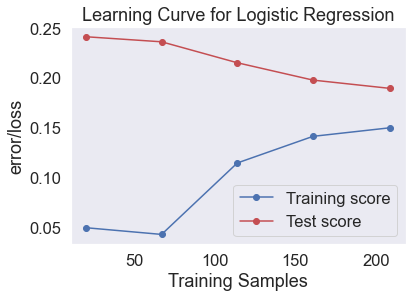

In [34]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

model_lr = LogisticRegression()
lr = model_lr.fit(X_train, Y_train)
predictions_lr = model_lr.predict(X_test)
predictions_lr_scores = model_lr.predict_proba(X_test)[:,1]

train_size, train_score, test_score = learning_curve(estimator=model_lr, X=X_train, y=Y_train, cv=10, scoring = None )

print(train_size)
print("***************")
print(train_score)
print("***************")
print(test_score)

train_loss_m = 1 - np.mean(train_score, axis=1)
test_loss_m = 1- np.mean(test_score, axis=1)

plt.plot(train_size, train_loss_m, 'o-', color="b")
plt.plot(train_size, test_loss_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("error/loss")
plt.title("Learning Curve for Logistic Regression")
plt.grid()

plt.show()

inf
2.928840573734881e-06
inf
2.0396035341763152e-06
inf
2.0396035341763152e-06
inf
2.0396035341763152e-06
inf
2.0396035341763152e-06
[93, 304, 514, 725, 936]
***************
[[0.7956989247311829, 0.7956989247311829, 0.7956989247311829, 0.7956989247311829, 0.7956989247311829, 0.7956989247311829, 0.7956989247311829, 0.7956989247311829, 0.7956989247311829, 0.7956989247311829], [0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506], [0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506], [0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506, 0.7896995708154506], [0.7896995708154

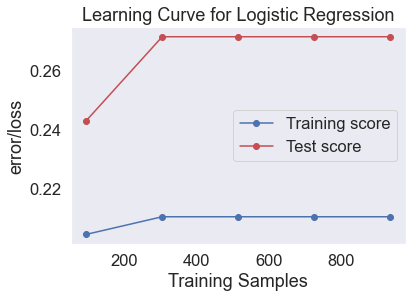

In [38]:
train_size = [93,304,514,725,936]
chunk = 10
train_score = []
test_score = []

for s in train_size:
    tr_s = []
    te_s = []
    
    X_tr = X_train[0:s]
    Y_tr = Y_train[0:s]
    W_lc = np.array(np.zeros((1,13)))

    gradient_ascent(X_tr,W_lc,Y_tr,0.00001,0.01)

    for e in np.array_split(X_tr, chunk):
        tr_s.append(prediction(W_lc,X_tr,Y_tr)[0])
        te_s.append(prediction(W_lc,X_test,Y_test)[0])

    train_score.append(tr_s)
    test_score.append(te_s)

train_loss_m = 1 - np.mean(train_score, axis=1)
test_loss_m = 1 - np.mean(test_score, axis=1)

print(train_size)
print("***************")
print(train_score)
print("***************")
print(test_score)

plt.plot(train_size, train_loss_m, 'o-', color="b")
plt.plot(train_size, test_loss_m, 'o-', color="r")
plt.legend(('Training score', 'Test score'), loc='best')
plt.xlabel("Training Samples")
plt.ylabel("error/loss")
plt.title("Learning Curve for Logistic Regression")
plt.grid()

plt.show()